<a href="https://colab.research.google.com/github/andysingal/xgboost/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XGBoost was specifically designed for speed. Speed gains allow machine learning models to build more quickly which is especially important when dealing with millions, billions, or trillions of rows of data. 

The following new design features give XGBoost a big edge in speed over comparable ensemble algorithms:

- Approximate split-finding algorithm

- Sparsity aware split-finding

- Parallel computing

- Cache-aware access

- Block compression and sharding


- Approximate split-finding algorithm:

Decision trees need optimal splits to produce optimal results. A greedy algorithm selects the best split at each step and does not backtrack to look at previous branches.

The split-finding algorithm uses quantiles, percentages that split data, to propose candidate splits. In a global proposal, the same quantiles are used throughout the entire training, and in a local proposal, new quantiles are provided for each round of splitting.





- Sparsity-aware split finding

Sparse data occurs when the majority of entries are 0 or null. A sparsity-aware split indicates that when looking for splits, XGBoost is faster because its matrices are sparse.

According to the original paper, XGBoost: A Scalable Tree Boosting System, the sparsity-aware split-finding algorithm performed 50 times faster than the standard approach on the All-State-10K dataset.


- Parallel computing
Boosting is not ideal for parallel computing since each tree depends on the results of the previous tree. 

Parallel computing occurs when multiple computational units are working together on the same problem at the same time. XGBoost sorts and compresses the data into blocks. These blocks may be distributed to multiple machines, or to external memory.

Sorting the data is faster with blocks. The split-finding algorithm takes advantage of blocks and the search for quantiles is faster due to blocks. In each of these cases, XGBoost provides parallel computing to expedite the model-building process.

- Cache-aware access
The data on your computer is separated into cache and main memory. The cache, what you use most often, is reserved for high-speed memory. The data that you use less often is held back for lower-speed memory. Different cache levels have different orders of magnitude of latency, as outlined here: https://gist.github.com/jboner/2841832.

When it comes to gradient statistics, XGBoost uses cache-aware prefetching. XGBoost allocates an internal buffer, fetches the gradient statistics, and performs accumulation with mini batches. According to XGBoost: A Scalable Tree Boosting System, prefetching lengthens read/write dependency and reduces runtimes by approximately 50% for datasets with a large number of rows.

- Block compression and sharding
XGBoost delivers additional speed gains through block compression and block sharding.

Block compression helps with computationally expensive disk reading by compressing columns. Block sharding decreases read times by sharding the data into multiple disks that alternate when reading the data.

- Accuracy gains
XGBoost adds built-in regularization to achieve accuracy gains beyond gradient boosting. Regularization is the process of adding information to reduce variance and prevent overfitting.





# New Section

**For further reading please check https://xgboost.readthedocs.io/en/latest/tutorials/model.html.**

## *Analyzing XGBoost parameters
The learning objective of a machine learning model determines how well the model fits the data. In the case of XGBoost, the learning objective consists of two parts: the **loss function** and the **regularization term**.

# **Higgs Boson Event Detection**

** Backstory

.1. Backstory
Particle accelerators. To probe into the basic questions on how matter, space and time work and how they are structured, physicists focus on the simplest interactions (for example, collision of subatomic particles) at very high energy. Particle accelerators enable physicists to explore the fundamental nature of matter by observing subatomic particles produced by high-energy collisions of particle beams. The experimental measurements from these collisions inevitably lack precision, which is where machine learning (ML) comes into picture. The research community typically relies on standardized machine learning software packages for the analysis of the data obtained from such experiments and spends a huge amount of effort towards improving statistical power by extracting features of significance, derived from the raw measurements.

Higgs boson. The Higgs boson particle, also called the God particle in mainstream media, is the final ingredient of the standard model of particle physics, which sets the rules for the subatomic particles and forces. The elementary particles are supposed to be massless at very high energies, but some of them can acquire mass at low-energies. The mechanism of this acquiring remained an enigma in theoretical physics for a long time. In 1964
, Peter Higgs and others proposed a mechanism that theoretically explains the origin of mass of elementary particles. The mechanism involves a field, commonly known as Higgs field, that the paricles can interact with to gain mass. The more a particle interacts with it, the heavier it is. Some particles, like photon, do not interact with this field at all and remain massless. The Higgs boson particle is the associated particle of the Higgs field (all fundamental fields have one). It is essentially the physical manifestation of the Higgs field, which gives mass to other particles. The detection of this elusive particle waited almost half a century since its theorization!

The discovery. On 4th July 2012, the ATLAS and CMS experiments at CERN's Large Hadron Collider announced that both of them had observed a new particle in the mass region around 125 GeV. This particle is consistent with the theorized Higgs boson. This experimental confirmation earned François Englert and Peter Higgs The Nobel Prize in Physics 2013

"for the theoretical discovery of a mechanism that contributes to our understanding of the origin of mass of subatomic particles, and which recently was confirmed through the discovery of the predicted fundamental particle, by the ATLAS and CMS experiments at CERN's Large Hadron Collider."

Giving mass to fermions. There are many different processes through which the Higgs boson can decay and produce other particles. In physics, the possible transformations a particle can undergo as it decays are referred to as channels. The Higgs boson has been observed first to decay in three distinct decay channels, all of which are boson pairs. To establish that the Higgs field provides the interaction which gives mass to the fundamental fermions (particles which follow the Fermi-Dirac statistics, contrary to the bosons which follow the Bose-Einstein statistics) as well, it has to be demonstrated that the Higgs boson can decay into fermion pairs through direct decay modes. Subsequently, to seek evidence on the decay of Higgs boson into fermion pairs (such as tau leptons (τ)
 or b-quarks) and to precisely measure their characteristics became one of the important lines of enquiry. Among the available modes, the most promising is the decay to a pair of tau leptons, which balances a modest branching ratio with manageable backgrounds.

The first evidence of h→τ+τ−
 decays was recently reported, based on the full set of proton–proton collision data recorded by the ATLAS experiment at the LHC during 2011
-2012
. Despite the consistency of the data with h→τ+τ−
 decays, it could not be ensured that the statistical power exceeds the 5σ
 threshold, which is the required standard for claims of discovery in high-energy physics community.

In [1]:
# File system manangement
import time, psutil, os

from IPython import display 

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

import seaborn as sns
sns.set_theme()
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Runtime and memory usage**

In [2]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

In [13]:
# Loading the training data
data_train = pd.read_csv('training.zip')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data_train.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data_train.shape)}).to_string())
data_train.head()

Memory usage         62.94 MB
Dataset shape    (250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [9]:
# Loading the test data
data_test = pd.read_csv('test.zip')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data_test.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data_test.shape)}).to_string())
data_test.head()

Memory usage        130.08 MB
Dataset shape    (550000, 31)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


## Basic Data Exploration

In [10]:
# Shape of the data
print(pd.Series({"Shape of the training set": data_train.shape,
                 "Shape of the test set": data_test.shape}).to_string())

Shape of the training set    (250000, 33)
Shape of the test set        (550000, 31)


In [11]:
# Count of observations
df_obs = pd.DataFrame(index = ['Number of observations'], columns = ['Training set', 'Test set'])
df_obs['Training set'] = len(data_train)
df_obs['Test set'] = len(data_test)
df_obs

,Training set,Test set
Number of observations,250000,550000


In [14]:
# Count of columns
df_cols_count = pd.DataFrame(index = ['Number of columns'], columns = ['Training set', 'Test set'])
df_cols_count['Training set'] = len(data_train.columns)
df_cols_count['Test set'] = len(data_test.columns)
df_cols_count

,Training set,Test set
Number of columns,33,31


In [15]:
# Column names for the training dataset
data_train.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [16]:
# Columns in the training dataset which are not in the test dataset
[col for col in data_train.columns if col not in data_test.columns]

['Weight', 'Label']

In [17]:
# Column datatypes for the training dataset
data_train.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

In [18]:
# Count of column datatypes for the training dataset
df_cols_train = pd.DataFrame(index = ['Number of columns for the training set'], columns = ['Integer', 'Float', 'Object'])
df_cols_train['Integer'] = len(data_train.columns[data_train.dtypes == 'int64'])
df_cols_train['Float'] = len(data_train.columns[data_train.dtypes == 'float64'])
df_cols_train['Object'] = len(data_train.columns[data_train.dtypes == 'object'])
df_cols_train

,Integer,Float,Object
Number of columns for the training set,2,30,1


In [19]:
# Integer columns in the training dataset
data_train.columns[data_train.dtypes == 'int64']

Index(['EventId', 'PRI_jet_num'], dtype='object')

In [20]:
# Object columns in the training dataset
data_train.columns[data_train.dtypes == 'object']

Index(['Label'], dtype='object')

In [21]:
# Count of column datatypes for the test dataset
df_cols_test = pd.DataFrame(index = ['Number of columns for the test set'], columns = ['Integer', 'Float', 'Object'])
df_cols_test['Integer'] = len(data_test.columns[data_test.dtypes == 'int64'])
df_cols_test['Float'] = len(data_test.columns[data_test.dtypes == 'float64'])
df_cols_test['Object'] = len(data_test.columns[data_test.dtypes == 'object'])
df_cols_test

,Integer,Float,Object
Number of columns for the test set,2,29,0


In [22]:
# Count of duplicate rows
df_duplicate_rows = pd.DataFrame(index = ['Number of duplicate rows'], columns = ['Training set', 'Test set'])
df_duplicate_rows['Training set'] = data_train.duplicated().sum()
df_duplicate_rows['Test set'] = data_test.duplicated().sum()
df_duplicate_rows

,Training set,Test set
Number of duplicate rows,0,0


In [23]:
# Count of columns with missing values
df_missing = pd.DataFrame(index = ['Number of columns with missing values'], columns = ['Training set', 'Test set'])
df_missing['Training set'] = len(data_train.isna().sum()[data_train.isna().sum() != 0])
df_missing['Test set'] = len(data_test.isna().sum()[data_test.isna().sum() != 0])
df_missing

,Training set,Test set
Number of columns with missing values,0,0


In [24]:
# Statistical description of numerical variables in the training set
data_train.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [25]:
# Statistical description of numerical variables in the test set
data_test.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,...,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000
mean,624999.500000,-48.950144,49.261093,81.123904,57.824801,-707.448878,-599.705905,-708.391425,2.374076,18.988277,...,-0.008214,209.933695,0.980171,-348.946684,-399.883839,-399.896234,-691.309277,-708.150605,-708.153058,73.248856
std,158771.468365,406.233686,35.425422,40.435560,63.291314,454.928791,659.129589,453.461222,0.779895,21.767376,...,1.812777,126.910079,0.979271,533.155176,489.467786,489.457747,480.435230,453.834190,453.830095,98.467134
min,350000.000000,-999.000000,0.000000,6.810000,0.000000,-999.000000,-999.000000,-999.000000,0.237000,0.000000,...,-3.142000,13.847000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000
25%,487499.750000,78.167750,19.313000,59.422000,14.192000,-999.000000,-999.000000,-999.000000,1.815000,2.838000,...,-1.574000,122.984750,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,624999.500000,105.076000,46.455500,73.747000,38.469500,-999.000000,-999.000000,-999.000000,2.492000,12.390000,...,-0.017000,179.949000,1.000000,38.970000,-1.862000,-2.111000,-999.000000,-999.000000,-999.000000,40.503500
75%,762499.250000,130.769000,73.646000,92.173000,79.234250,0.503000,84.266250,-4.538000,2.962000,27.649000,...,1.558000,263.917250,2.000000,75.499000,0.431000,0.484000,33.832000,-2.429000,-2.260000,110.507000
max,899999.000000,1949.261000,968.669000,1264.965000,1337.187000,8.724000,4794.827000,17.294000,5.751000,759.363000,...,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


**Training set synopsis:**

- Number of observations:  250000
 
- Number of columns:  33
 
- Number of integer columns:  2
 
- Number of float columns:  30
 
- Number of object columns:  1
 
- Number of duplicate observations:  0
 
- Constant columns: None
= Number of columns with missing values:  0
 
- Memory Usage:  62.94
  MB

**Test set synopsis:**

- Number of observations:  550000
 
- Number of columns:  31
 
- Number of integer columns:  2
 
- Number of float columns:  29
 
- Number of object columns:  0
 
- Number of duplicate observations:  0
 
- Constant columns: None
- Number of columns with missing values:  0
 
- Memory Usage:  130.08
  MB

## Univariate Analysis

#Target variable

The target Label is a binary variable, taking values b and s, indicating the status of an event.
b↦background events↦signal event


In [26]:
# Function to construct barplot and donutplot of a dataframe column
def bar_donut(df, col, h = 500, w = 800):
    fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'xy'}, {'type': 'domain'}]])
    x_val, y_val = df[col].value_counts(sort = False).index.tolist(), df[col].value_counts(sort = False).tolist()
    fig.add_trace(go.Bar(x = x_val, y = y_val, text = y_val, textposition = 'auto'), row = 1, col = 1)
    fig.add_trace(go.Pie(values = y_val, labels = x_val, hole = 0.5, textinfo = 'label+percent', title = f"{col}"), row = 1, col = 2)
    fig.update_layout(height = h, width = w, showlegend = False, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1), title = dict(text = f"Frequency distribution of {col}", x = 0.5, y = 0.95)) 
    fig.show()

In [27]:
# Target variable
bar_donut(data_train, 'Label')


In [28]:
# Splitting the training by target class
data_train_b = data_train[data_train['Label'] == 'b'] # Background events in the training set
data_train_s = data_train[data_train['Label'] == 's'] # System events in the training set

## Predictor variables

In [29]:
# Number of unique values for the predictor variables
df_unique = pd.DataFrame()
df_unique['Training set (background events)'] = [data_train_b[col].nunique() for col in data_test.columns]
df_unique['Training set (signal events)'] = [data_train_s[col].nunique() for col in data_test.columns]
df_unique['Training set (all events)'] = [data_train[col].nunique() for col in data_test.columns]
df_unique['Test set (all events)'] = [data_test[col].nunique() for col in data_test.columns]
df_unique.set_index(data_test.columns, inplace = True)
df_unique.style.set_caption("Number of unique values for the predictor variables")

,Training set (background events),Training set (signal events),Training set (all events),Test set (all events)
EventId,164333,85667,250000,550000
DER_mass_MMC,85521,51645,108338,152743
DER_mass_transverse_met_lep,87812,50941,101637,123271
DER_mass_vis,88377,48615,100558,134982
DER_pt_h,84305,64625,115563,165204
DER_deltaeta_jet_jet,5624,6989,7087,7487
DER_mass_jet_jet,38310,31880,68366,140826
DER_prodeta_jet_jet,11605,13627,16593,20258
DER_deltar_tau_lep,4688,3399,4692,4900
DER_pt_tot,50605,36604,59042,76134


In [33]:
# Proportion of the value -999 in the dataset columns
def minus_999(df):
    index = [col for col in df.columns if -999 in df[col].value_counts().index]
    data = [df[col].value_counts()[-999]/len(df) for col in index]
    return pd.Series(index = index, data = data).sort_values(ascending = False)

df_minus_999 = pd.DataFrame()
df_minus_999['Training set (background events)'] = minus_999(data_train_b).values
df_minus_999['Training set (signal events)'] = minus_999(data_train_s).values
df_minus_999['Training set (all events)'] = minus_999(data_train).values
df_minus_999['Test set (all events)'] = minus_999(data_test).values
df_minus_999.set_index(minus_999(data_train).index, inplace = True)
df_minus_999.style.set_caption("Proportion of the value -999 in the dataset columns which contain -999")

,Training set (background events),Training set (signal events),Training set (all events),Test set (all events)
DER_deltaeta_jet_jet,0.756117,0.621033,0.709828,0.708858
DER_mass_jet_jet,0.756117,0.621033,0.709828,0.708858
DER_prodeta_jet_jet,0.756117,0.621033,0.709828,0.708858
DER_lep_eta_centrality,0.756117,0.621033,0.709828,0.708858
PRI_jet_subleading_pt,0.756117,0.621033,0.709828,0.708858
PRI_jet_subleading_eta,0.756117,0.621033,0.709828,0.708858
PRI_jet_subleading_phi,0.756117,0.621033,0.709828,0.708858
PRI_jet_leading_pt,0.452867,0.297571,0.399652,0.400284
PRI_jet_leading_eta,0.452867,0.297571,0.399652,0.400284
PRI_jet_leading_phi,0.452867,0.297571,0.399652,0.400284


In [41]:
# Combining the data
data_train_temp = data_train.copy(deep = True)
data_train_temp['dataset'] = "Train"
data_test_temp = data_test.copy(deep = True)
data_test_temp['dataset'] = "Test"
data = pd.concat([data_train_temp, data_test_temp], axis = 0, ignore_index = True)

# Float features

Comparison of feature distributions for the training set and the test set
First we check the distributions of the features for the training set and the test set. If we are to train our model on one set (the training set) and use it to make predictions on another (the test set), then it is desirable that the distributions corresponding to the two sets have similar structure.

In [42]:
# Function to plot distributions of the float features
def hist(df, cols, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = 'dataset', palette = ['red', 'grey'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

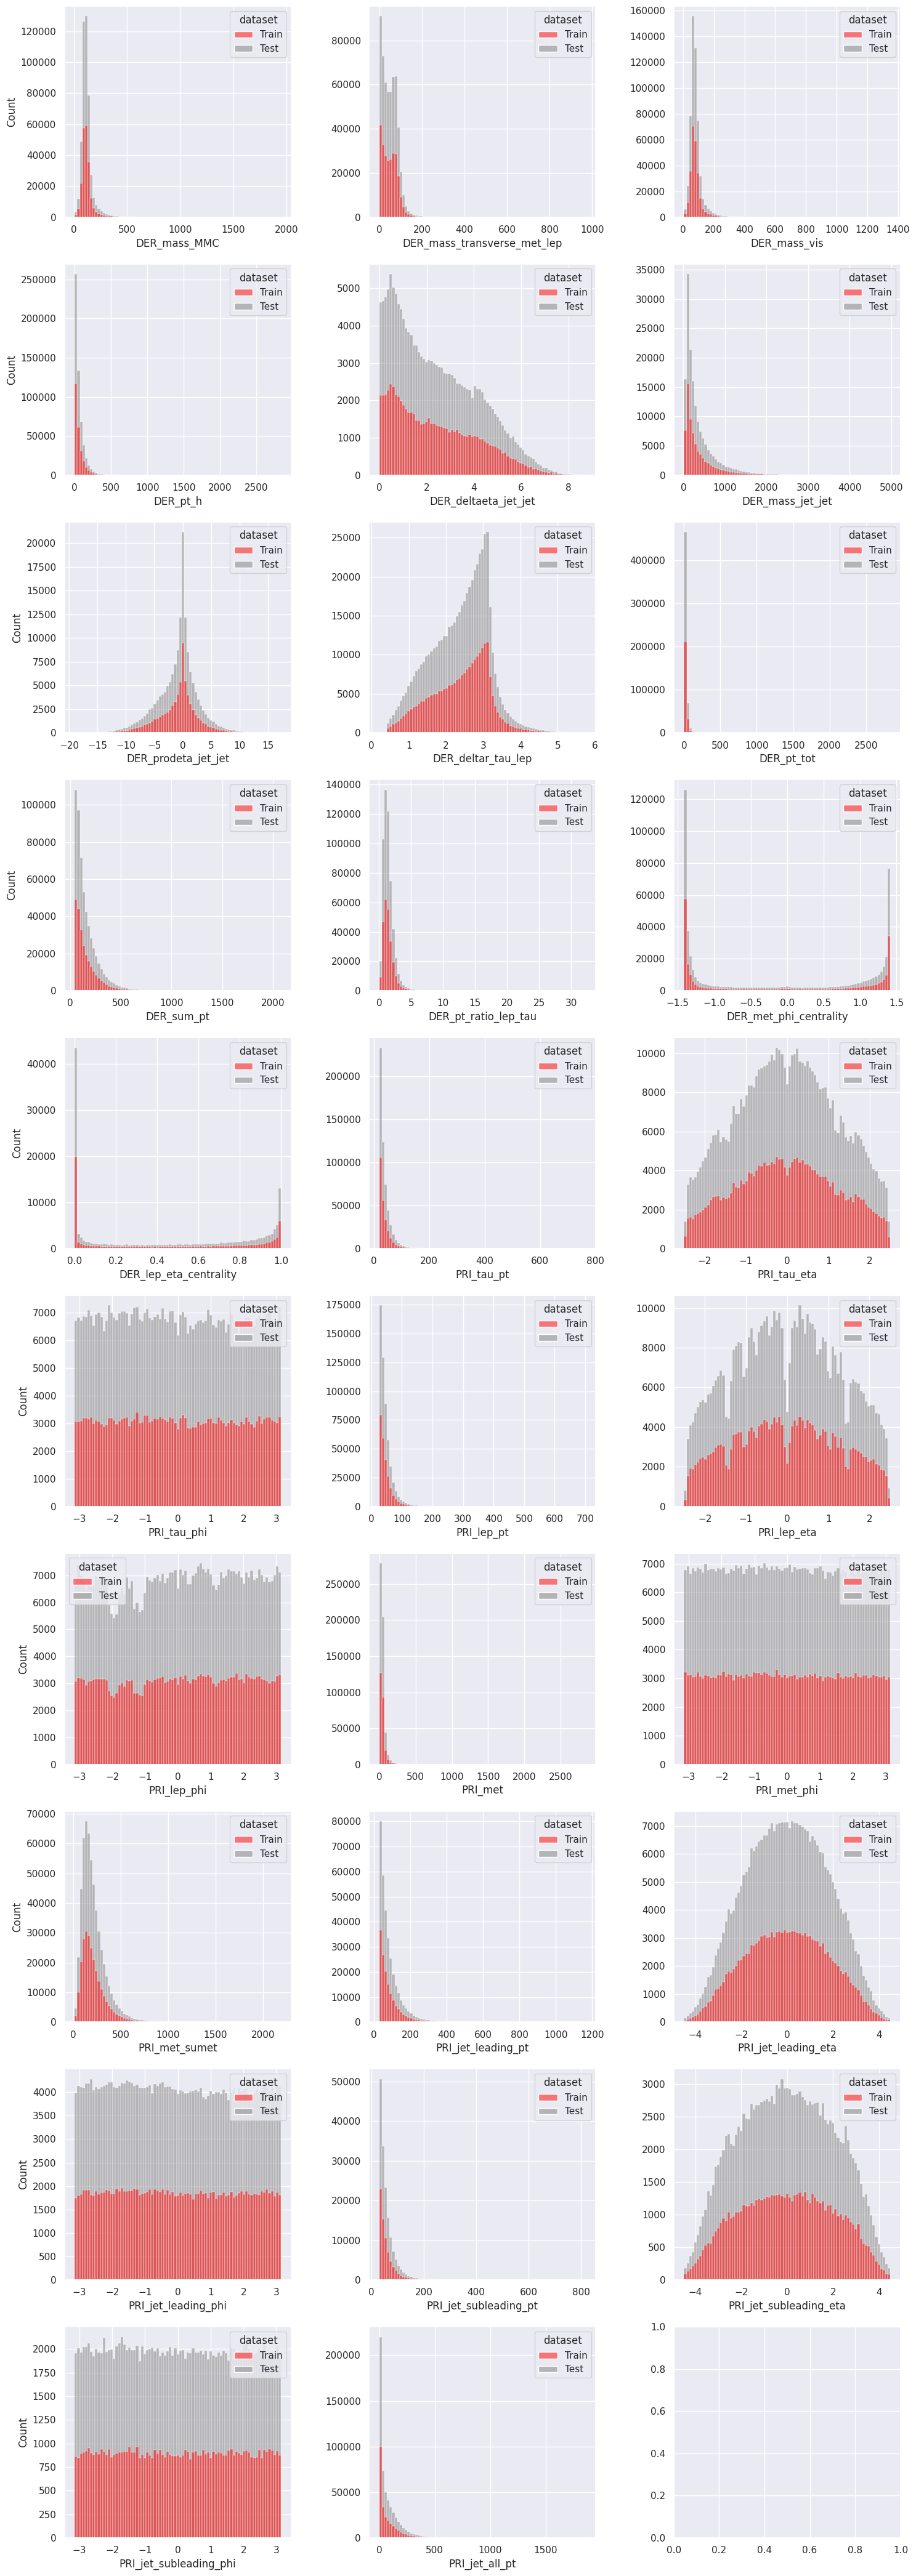

In [43]:
# Distributions of the float features
hist(data.replace(-999, np.nan),
     list(data_test.columns[data_test.dtypes == 'float64']),
     bins = max(math.floor(len(data_train)**(1/3)), math.floor(len(data_test)**(1/3))),
     ncols = 3)

# **Comparison of feature distributions by target class in the training set**

Next we compare the univariate distributions of the features for the background events and the signal events in the training set. If a feature has reasonably different distributions corresponding to the background events and the signal events, then it is a clear indication that the feature is important in the task of classifying the events when the label is unknown. Similarly, if a feature has very similar distributions for the two target classes, then it is unlikely to help in the classification problem based on the feature alone. This, however, does not take into account the possible dependence the feature may have with other features which may turn out to be useful in the task of classification. A multivariate analysis will be required to check that.

In [44]:
# Function to plot distributions of the float features in the training set by target class
def hist_target(df, cols, target, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = target, palette = ['red', 'grey'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

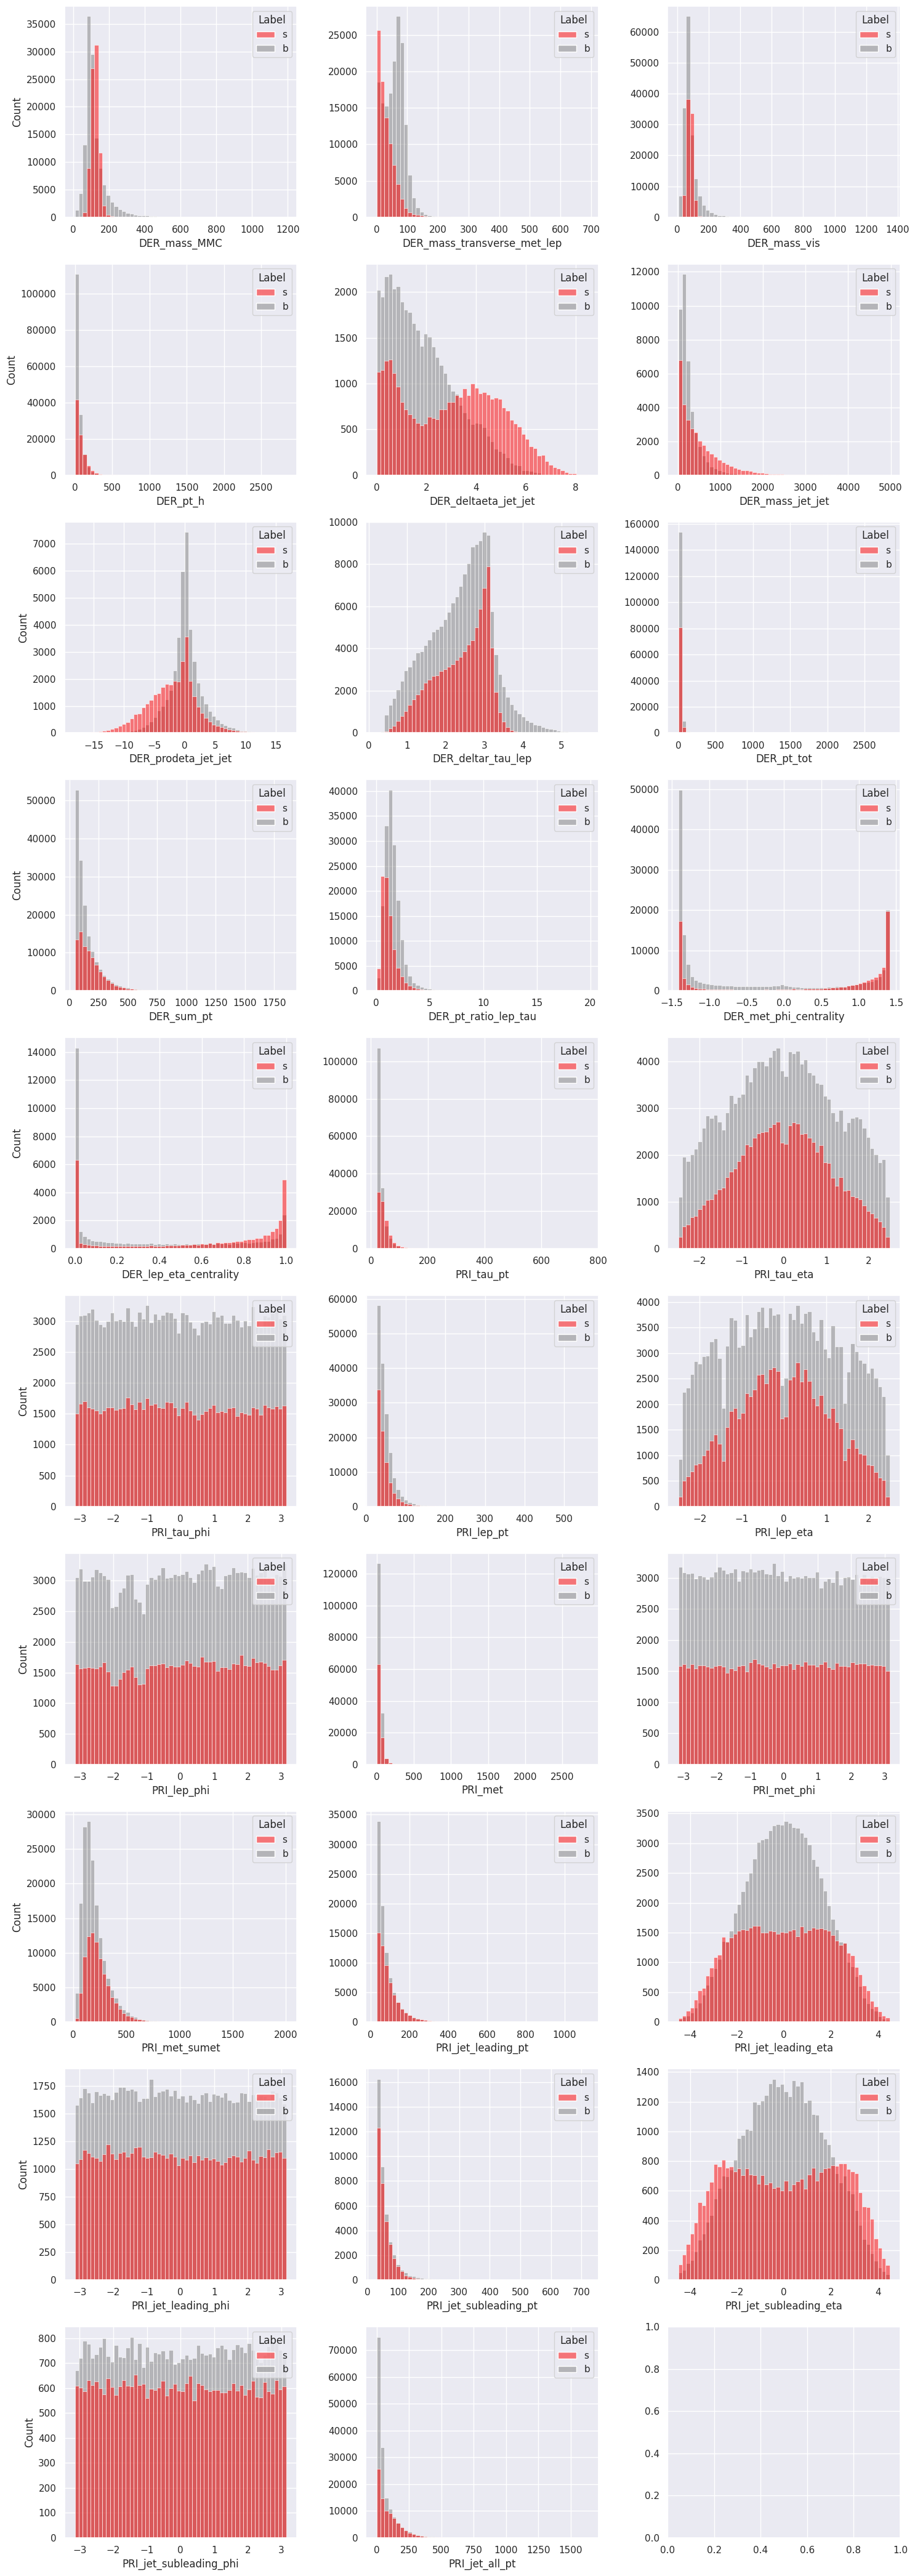

In [45]:
# Distributions of the float features in the training set by target class
hist_target(data_train.replace(-999, np.nan),
     list(data_test.columns[data_test.dtypes == 'float64']),
     target = 'Label',
     bins = max(math.floor(len(data_train_b)**(1/3)), math.floor(len(data_train_s)**(1/3))),
     ncols = 3)

Skewness

Skewness quantifies the asymmetry of a distribution about its mean. It is given by

𝑔1:=1𝑛∑𝑛𝑖=1(𝑥𝑖−𝑥¯)3[1𝑛∑𝑛𝑖=1(𝑥𝑖−𝑥¯)2]3/2,
 
where  𝑥¯
  is the mean of the observations, given by  𝑥¯=1𝑛∑𝑛𝑖=1𝑥𝑖
 . The measure  𝑔1
  can be negative, zero, positive. A value close to  0
  suggests that the distribution is more or less symmetric. However, as it deviates from  0
 , it becomes more and more skewed (either positively or negatively). A positive skewness indicates that the distribution is concentrated towards the left side, with the longer tail being on the right side. A negative skewness indicates that the distribution is concentrated towards the right side, with the longer tail being on the left side.

In [46]:
# Skewness of the float features
df_skew = pd.DataFrame()
cols_float_test = data_test.columns[data_test.dtypes == 'float64']
skew_train_b = data_train_b.replace(-999, np.nan)[cols_float_test].skew().values
skew_train_s = data_train_s.replace(-999, np.nan)[cols_float_test].skew().values
skew_train = data_train.replace(-999, np.nan)[cols_float_test].skew().values
skew_test = data_test.replace(-999, np.nan)[cols_float_test].skew().values
df_skew['Training set (background events)'], df_skew['Training set (signal events)'] = skew_train_b, skew_train_s
df_skew['Training set (all events)'], df_skew['Test set (all events)'] = skew_train, skew_test
df_skew.set_index(np.array(cols_float_test), inplace = True)
df_skew.style.set_caption("Skewness of the float features")

,Training set (background events),Training set (signal events),Training set (all events),Test set (all events)
DER_mass_MMC,3.234194,5.409466,3.807351,3.824925
DER_mass_transverse_met_lep,0.919176,2.687542,1.219211,1.340668
DER_mass_vis,3.344057,4.348492,3.790262,3.602688
DER_pt_h,2.444281,2.419227,2.541885,2.272145
DER_deltaeta_jet_jet,0.788742,0.104843,0.577082,0.579983
DER_mass_jet_jet,2.673334,1.782598,2.457852,2.437294
DER_prodeta_jet_jet,0.215342,-0.137686,-0.328458,-0.335199
DER_deltar_tau_lep,-0.111639,-0.527265,-0.215782,-0.227758
DER_pt_tot,2.642732,22.143181,10.579309,2.848232
DER_sum_pt,2.641115,1.941645,2.320647,2.376312


**Observations:**

- Columns with extreme positive skewness (absolute value greater than  3
  in the training set): DER_mass_MMC, DER_mass_vis, DER_pt_tot, PRI_tau_pt, PRI_lep_pt, PRI_met, PRI_jet_subleading_pt

- Columns with high positive skewness (absolute value between  1
  and  3 in the training set): DER_mass_transverse_met_lep, DER_pt_h, DER_mass_jet_jet, DER_sum_pt, DER_pt_ratio_lep_tau, PRI_met_sumet, PRI_jet_leading_pt, PRI_jet_all_pt

- Columns with moderate positive skewness (absolute value between  0.5
  and  1 in the training set): DER_deltaeta_jet_jet